# Task 2
## Predictiction of student's score by hours of study
* In this task I was given with the url link where the data of student about the numbers of hours they studied and respective  score they got.
* I have converted that url data in to csv file named "scores".

### (1) What's in the dataset ?

* Intuition is that if the student study more he or she will get more score

In [1]:
#Getting our things ready...
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing various machine learning algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#extra imports
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


In [2]:
#reding the data...
data = pd.read_csv("scores.csv")
data.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


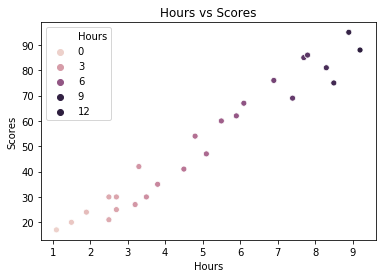


------------------------------------------------------------------------------------------------------------------------------
Form the graph we can see that there is linear positive relationship between hours of study and scores.
The more they study the more score they will get.


In [3]:
#let's see that our intuition is right or wrong by plotting the graph.....
sns.scatterplot(x= data.Hours ,y= data.Scores, data=data, hue= data.Hours)
plt.title('Hours vs Scores')
plt.show()
print('\n------------------------------------------------------------------------------------------------------------------------------')
print('Form the graph we can see that there is linear positive relationship between hours of study and scores.\nThe more they study the more score they will get.')

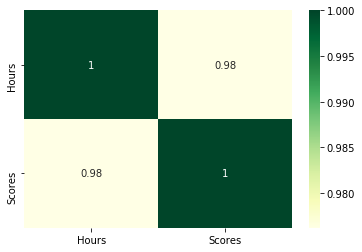


------------------------------------------------------------------------------------------------------------------------------
we can see that there is 98% corelation between Hours and Scores


In [4]:
#what is the corelation??
relation = data.corr()
sns.heatmap(relation,annot=True,cmap='YlGn')
plt.show()
print('\n------------------------------------------------------------------------------------------------------------------------------')
print('we can see that there is 98% corelation between Hours and Scores');

## Let's split the data for machine learning model

In [5]:
x = data.drop('Scores',axis=1)
y = data.Scores
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

# Note:
 
* In next task we will see the better way of doing this kind of repetitive work but for the sake of this task I will repeat the codes.
* We will use separate codes for each models.

### ~(1) Linear Regression

The train score:  0.9503779749937483
The test score:   0.9387377974189179


For parameters {'fit_intercept': False} we get best R squared score of 93.8737797418918 %

-----------------------------------------------------------------------------------

The dataframe of actual and predicted values

    Actual  Predicted
5       20  15.337585
2       27  32.720181
19      69  75.665418
16      30  25.562641
11      62  60.327833

-----------------------------------------------------------------------------------

The root mean squared error is 4.926919438221814 units.

If student study 9.25 hrs daily acoording to LinearRegression model he will score [94.58177251]


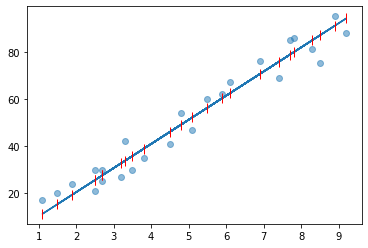

In [13]:
#setting up the seed
np.random.seed(0)

#Training and getting accuracy with the model
lr = LinearRegression()
grid = {'fit_intercept': [True ,False]}

#Fitting the training data
gs = GridSearchCV(lr,cv=6,param_grid=grid)
gs.fit(x_train,y_train)
print(f'The train score:  {gs.score(x_train,y_train)}')
print(f'The test score:   {gs.score(x_test,y_test)}')

#predicting the accuracy
print('\n')
print(f'For parameters {gs.best_params_} we get best R squared score of {(gs.score(x_test,y_test))*100} %')

#Plotting
plt.scatter(x,y,alpha=0.5)
lr = LinearRegression(fit_intercept= False)
lr.fit(x_train,y_train)
plt.plot(x,x*lr.coef_ + lr.intercept_, marker = '|',mec = 'r',ms=10,);

#Predicting 
y_pred = gs.predict(x_test)
print('\n-----------------------------------------------------------------------------------')
print('\nThe dataframe of actual and predicted values\n')
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))

#Error
print('\n-----------------------------------------------------------------------------------')
print(f'\nThe root mean squared error is {np.sqrt(mean_squared_error(y_test,y_pred))} units.')

#Prediction if Student study 9.25 hrs daily
print(f'\nIf student study 9.25 hrs daily acoording to LinearRegression model he will score {gs.predict([[9.25],])}')

### ~(2) KNeighbors Regressor
* Its not good algo for this regression due to poor generalization. It fits training data well but not the test data even after tuning.
* So don't run it because I have used too many grid params to get better result but did't get it.

In [46]:
#Setting up the seed
np.random.seed(0)

#Setting up the GridSearchCV and model
knr = KNeighborsRegressor()
grid = {'n_neighbors': range(1,15) ,'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree'],'leaf_size':range(1,30),'p':[1,2],'metric':['minkowski']}
gs = GridSearchCV(knr,param_grid= grid , cv=6)

#Fitting the training data
gs.fit(x_train,y_train)
print(f'\nThe train score:  {gs.score(x_train,y_train)}')
print(f'The test score:   {gs.score(x_test,y_test)}')

#Predicting the accuracy
print(f'\nFor parameters {gs.best_params_} we get best R-squared score of {(gs.score(x_test,y_test))*100} %')

#Predicting 
y_pred = gs.predict(x_test)
print('\n-----------------------------------------------------------------------------------')
print('\nThe dataframe of actual and predicted values\n')
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))

#Error
print('\n-----------------------------------------------------------------------------------')
print(f'\nThe root mean squared error is {np.sqrt(mean_squared_error(y_test,y_pred))} units')

#Prediction if Student study 9.25 hrs daily
print(f'\nIf student study 9.25 hrs daily acoording to KNeighbors Regression model he will score {gs.predict([[9.25],])}')


The train score:  0.9733436822566925
The test score:   0.8102160306884716

For parameters {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'} we get best R-squared score of 81.02160306884716 %

-----------------------------------------------------------------------------------

The dataframe of actual and predicted values

    Actual  Predicted
5       20      20.50
2       27      36.00
19      69      85.50
16      30      25.50
11      62      63.50

-----------------------------------------------------------------------------------

The root mean squared error is 8.67179335547152 units

If student study 9.25 hrs daily acoording to KNeighbors Regression model he will score [91.5]


### ~(3) Ridge Regression

In [18]:
#Setting up the seed
np.random.seed(0)

#Setting up the GridSearchCV and model
rg = Ridge()
grid = {'alpha' : range(1,100)}
gs = GridSearchCV(rg, param_grid = grid , cv=6 )

#Fitting the training data
gs.fit(x_train,y_train)
print(f'\nThe train score:  {gs.score(x_train,y_train)}')
print(f'The test score:   {gs.score(x_test,y_test)}')

#Predicting the accuracy
print(f'\nFor parameters {gs.best_params_} we get best R-squared score of {(gs.score(x_test,y_test))*100} %')

#Predicting 
y_pred = gs.predict(x_test)
print('\n-----------------------------------------------------------------------------------')
print('\nThe dataframe of actual and predicted values\n')
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))

#Error
print('\n-----------------------------------------------------------------------------------')
print(f'\nThe root mean squared error is {np.sqrt(mean_squared_error(y_test,y_pred))} units')

#Prediction if Student study 9.25 hrs daily
print(f'\nIf student study 9.25 hrs daily acoording to Ridge Regression model he will score {gs.predict([[9.25],])}')


The train score:  0.9480329453724264
The test score:   0.9516770501893197

For parameters {'alpha': 8} we get best R-squared score of 95.16770501893197 %

-----------------------------------------------------------------------------------

The dataframe of actual and predicted values

    Actual  Predicted
5       20  19.137936
2       27  34.961602
19      69  74.055363
16      30  28.445975
11      62  60.093305

-----------------------------------------------------------------------------------

The root mean squared error is 4.375784002094248 units

If student study 9.25 hrs daily acoording to Ridge Regression model he will score [91.2752341]


### ~(4) Lasso Regression

In [19]:
#setting up the seed
np.random.seed(0)

#Setting up the GridSearchCV and model
ls = Lasso()
grid = {'alpha' : range(1,100)}
gs = GridSearchCV(ls, param_grid = grid , cv=6)

#Fitting the training data
gs.fit(x_train,y_train)
print(f'\nThe train score:  {gs.score(x_train,y_train)}')
print(f'The test score:   {gs.score(x_test,y_test)}')

#Predicting the accuracy
print(f'\nFor parameters {gs.best_params_} we get best R-squared score of {(gs.score(x_test,y_test))*100} %')

#Predicting 
y_pred = gs.predict(x_test)
print('\n-----------------------------------------------------------------------------------')
print('\nThe dataframe of actual and predicted values\n')
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))

#Error
print('\n-----------------------------------------------------------------------------------')
print(f'\nThe root mean squared error is {np.sqrt(mean_squared_error(y_test,y_pred))} units')

#Prediction if Student study 9.25 hrs daily
print(f'\nIf student study 9.25 hrs daily acoording to Lasso Regression model he will score {gs.predict([[9.25],])}')
print('\n-----------------------------------------------------------------------------------')


The train score:  0.947490425905118
The test score:   0.9516866686682858

For parameters {'alpha': 4} we get best R-squared score of 95.16866686682857 %

-----------------------------------------------------------------------------------

The dataframe of actual and predicted values

    Actual  Predicted
5       20  19.305484
2       27  35.052991
19      69  73.958598
16      30  28.568723
11      62  60.063738

-----------------------------------------------------------------------------------

The root mean squared error is 4.37534848976381 units

If student study 9.25 hrs daily acoording to Lasso Regression model he will score [91.09559109]

-----------------------------------------------------------------------------------


# THANK YOU

#  Things which I have learned ...

(1) Use Lazypredict instead of doing this kind of repetitive work.
    Then choose best model and tune it.

`!pip install lazypredict`

In [29]:
from lazypredict.Supervised import LazyRegressor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [30]:
reg = LazyRegressor(ignore_warnings=True)
models,predictions = reg.fit(x_train, x_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 69.31it/s]


,R-Squared,RMSE,Time Taken
Model,,,
Ridge,0.95,4.39,0.01
Lasso,0.95,4.41,0.00
ElasticNetCV,0.95,4.48,0.04
LassoCV,0.95,4.51,0.04
SGDRegressor,0.95,4.59,0.00
RidgeCV,0.95,4.61,0.00
BayesianRidge,0.95,4.63,0.00
LinearRegression,0.95,4.65,0.00
LarsCV,0.95,4.65,0.01
